![](images/mk.png)

<h1><center>ONLINE SUPPLEMENT</center></h1>

John McLevey & Reid-McIlroy-Young. **Introducing *metaknowledge*: Software for Computational Research in Information Science, Science of Science, and Network Analysis.** *Journal of Informetrics*. XX(XX):XX-XX.

<h1><center>Part 4: Network Analysis</center></h1>

These supplementary notebooks were prepared by Dr. [John McLevey](http://www.johnmclevey.com/) (University of Waterloo), [Reid McIlroy-Young](http://reidmcy.com/) (University of Chicago), and [Jillian Anderson](http://networkslab.org/) (NetLab, University of Waterloo). The code in this notebook is current as of *metaknowledge* version XXX.

In [9]:
%matplotlib inline

import metaknowledge as mk
import matplotlib.pyplot as plt
import networkx as nx
import community
import pandas

plt.rc("savefig", dpi=300) # improve default resolution of graphics

import os
os.chdir('.') # .. is a special symbol for the directory above the current one

In [10]:
RC = mk.RecordCollection('raw_data/imetrics/', cached = True)
RC1014 = RC.yearSplit(2010,2014)

## Co-Author Networks

In [11]:
coauth_net = RC.networkCoAuthor() 
print(mk.graphStats(coauth_net))

The graph has 10104 nodes, 15507 edges, 1111 isolates, 0 self loops, a density of 0.000303818 and a transitivity of 0.555409


In [12]:
mk.dropEdges(coauth_net, minWeight = 2, dropSelfLoops = True) 
giant = max(nx.connected_component_subgraphs(coauth_net), key=len)
mk.graphStats(giant)

'The graph has 265 nodes, 443 edges, 0 isolates, 0 self loops, a density of 0.0126644 and a transitivity of 0.285714'

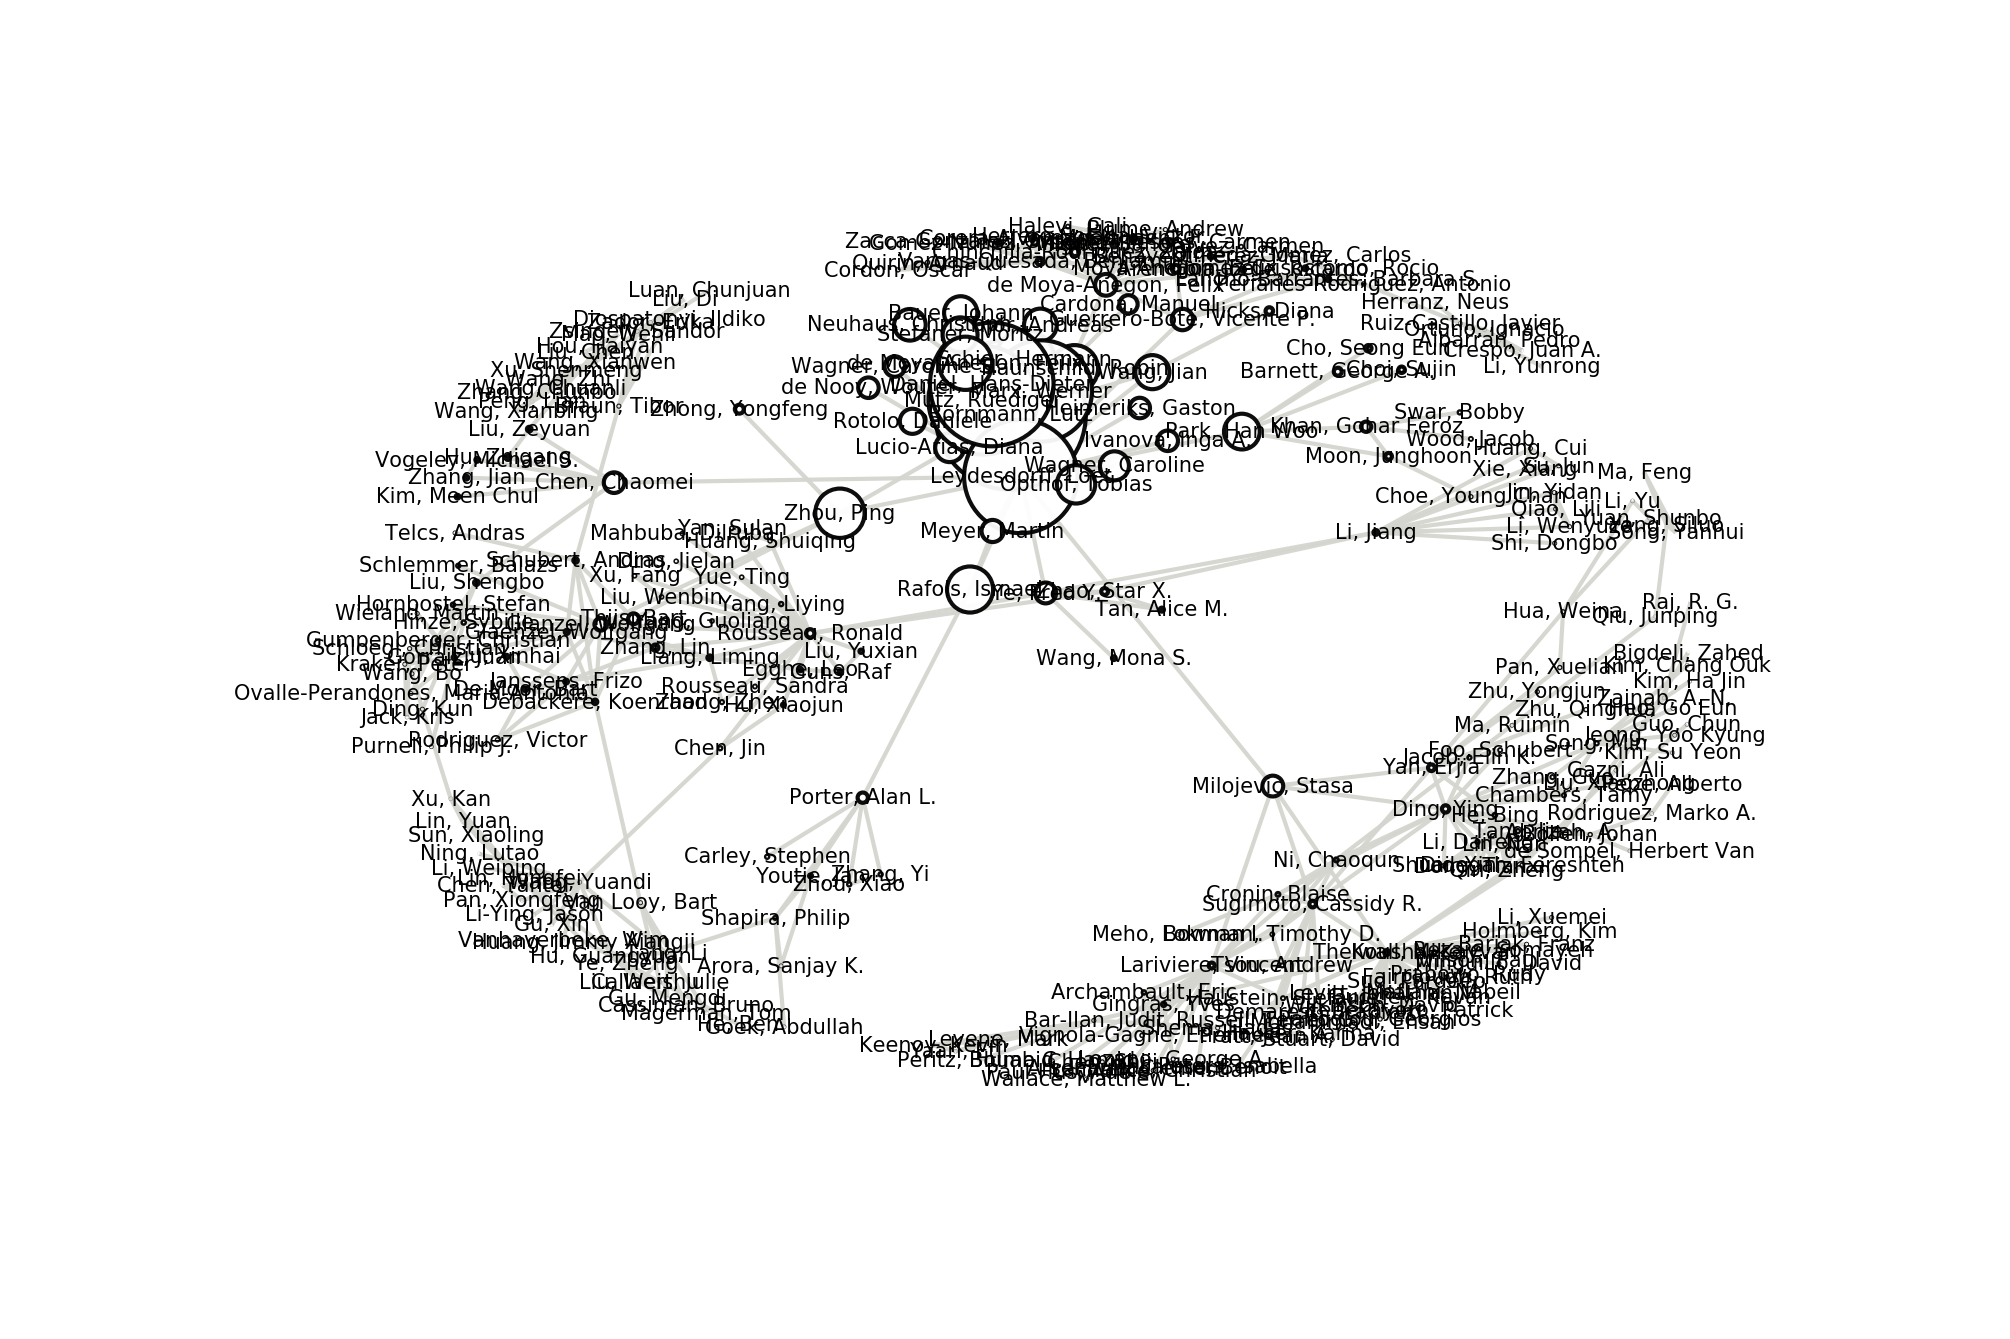

In [13]:
eig = nx.eigenvector_centrality(giant)
size = [2000 * eig[node] for node in giant]

nx.draw_spring(giant, node_size = size, with_labels = True, font_size = 5, 
               node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_coauthors.pdf')

In [14]:
# no idea why, but this doesn't run on my laptop... it used it (see article)
# I am going to leave the code and test it later. 

partition = community.best_partition(giant)
modularity = community.modularity(partition, giant) 
print('Modularity:', modularity)

AttributeError: 'module' object has no attribute 'best_partition'

In [ ]:
colors = [partition[n] for n in giant.nodes()] 
nx.draw_spring(giant, node_color=colors , cmap=plt.cm.Accent , node_size = degSize)
plt.savefig('figures/coauthors_community.pdf')

# Co-Citation

In [15]:
document_cite = RC1014.networkCitation()

In [16]:
document_cocite = RC1014.networkCoCitation()
journal_cocite = RC1014.networkCoCitation(nodeType = 'journal')

In [ ]:
journal_cocite = RC1014.networkCoCitation(coreOnly = True) 
mk.dropEdges(journal_cocite , minWeight = 3)

In [17]:
# visualize the giant component only
giant = max(nx.connected_component_subgraphs(journal_cocite), key=len)
partition = community.best_partition(giant2) 
modularity = community.modularity(partition, giant2) 
print(modularity)

colors = [partition[n] for n in giant2.nodes()] 
nx.draw_spring(giant2,
               node_color=colors, with_labels = False, cmap=plt.cm.Accent, node_size = 100)
plt.savefig('figures/cocite_uniform_community.pdf')

AttributeError: 'module' object has no attribute 'best_partition'

# Co-Investigator Networks

# One-Mode Networks (e.g. Keyword Co-Occurance)

# Two-Mode Networks

# Multi-Mode Networks

# Multi-Level Networks

# Writing Networks to Disk

# Interactive Network Visualizations with *mkD3*

Jillian, this section is all yours. :-)